In [2]:
import time
import sys
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split, KFold
import multiprocessing
import os
from scipy import sparse
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn import ensemble
import datetime as dt
from datetime import date
import calendar
from calendar import weekday, day_name
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy as sp
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy as sp
from sklearn.datasets import make_regression

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


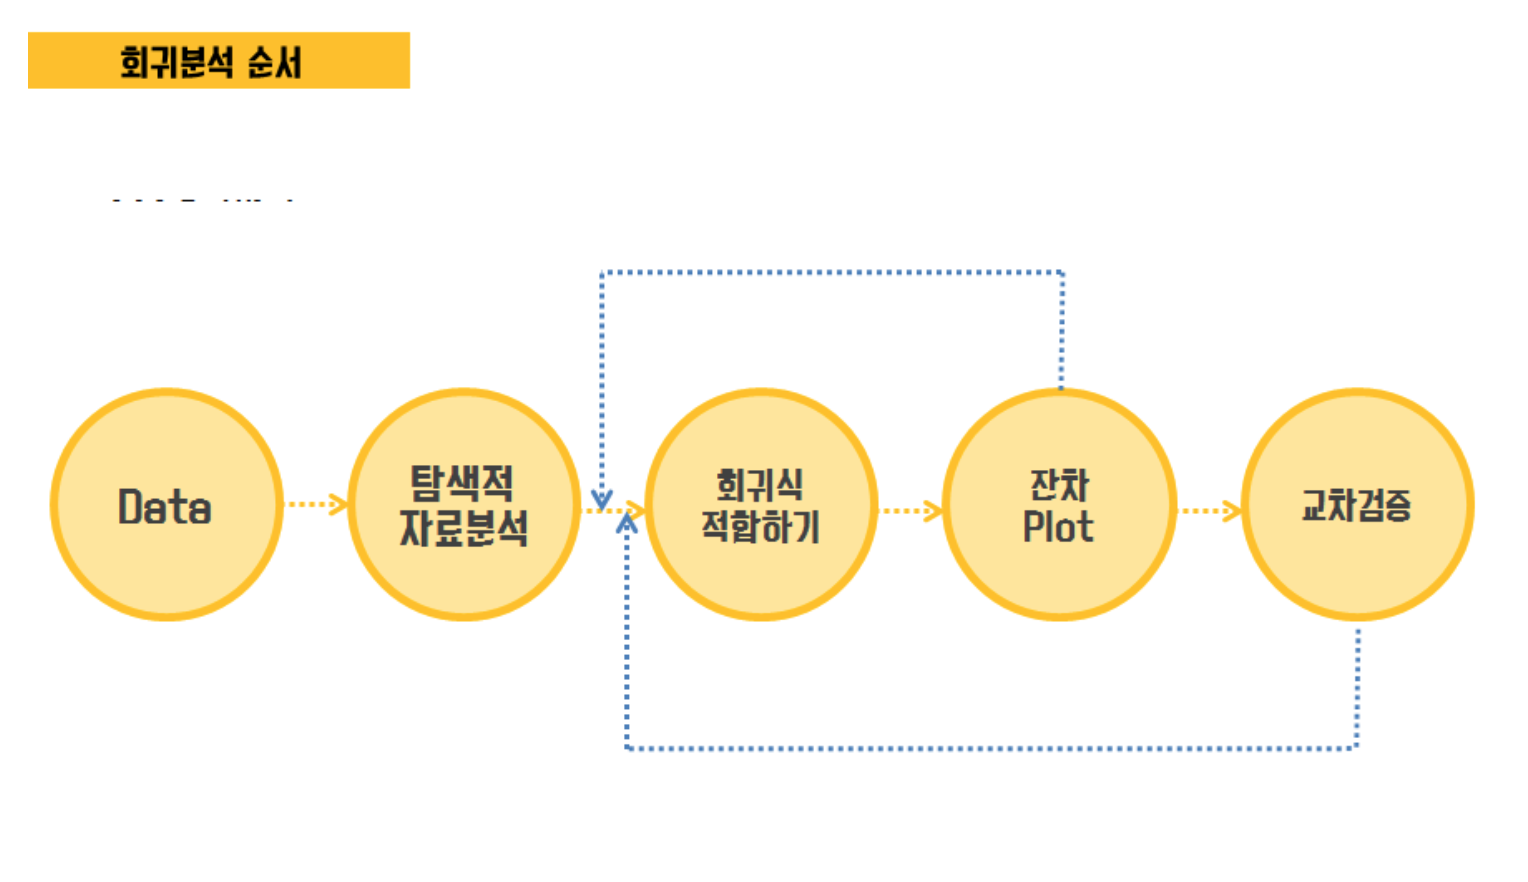

## 잔차 정규성
데이터가 모형 가정을 만족하면 분석결과로 나온 잔차는 정규분포를 따라야 한다.

### QQ플롯
선형을 이루는지 확인

In [ ]:
sp.stats.probplot(result.resid, plot=plt)
plt.show()

### 정규성 검정

In [ ]:
test = sms.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

## Partial Regression Plot
독립변수의 갯수가 많을 경우에 특정한 하나의 독립변수의 영향력을 시각화하는 방법이 Partial Regression Plot이다.

Partial Regression Plot을 그리기 위해서는 3번의 선형회귀를 해야한다.

1. 특정한 독립변수 Z를 제외한 나머지 독립변수 X들로 종속변수를 선형회귀하여 잔차  eYX
 를 구한다.
2. 나머지 독립변수 X들로 특정한 독립변수 선형회귀하여 잔차  eZX
 를 구한다.
3. 잔차  eZX
 를 독립변수로, 잔차  eYX
 를 종속변수로 하여 선형회귀한다.

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()

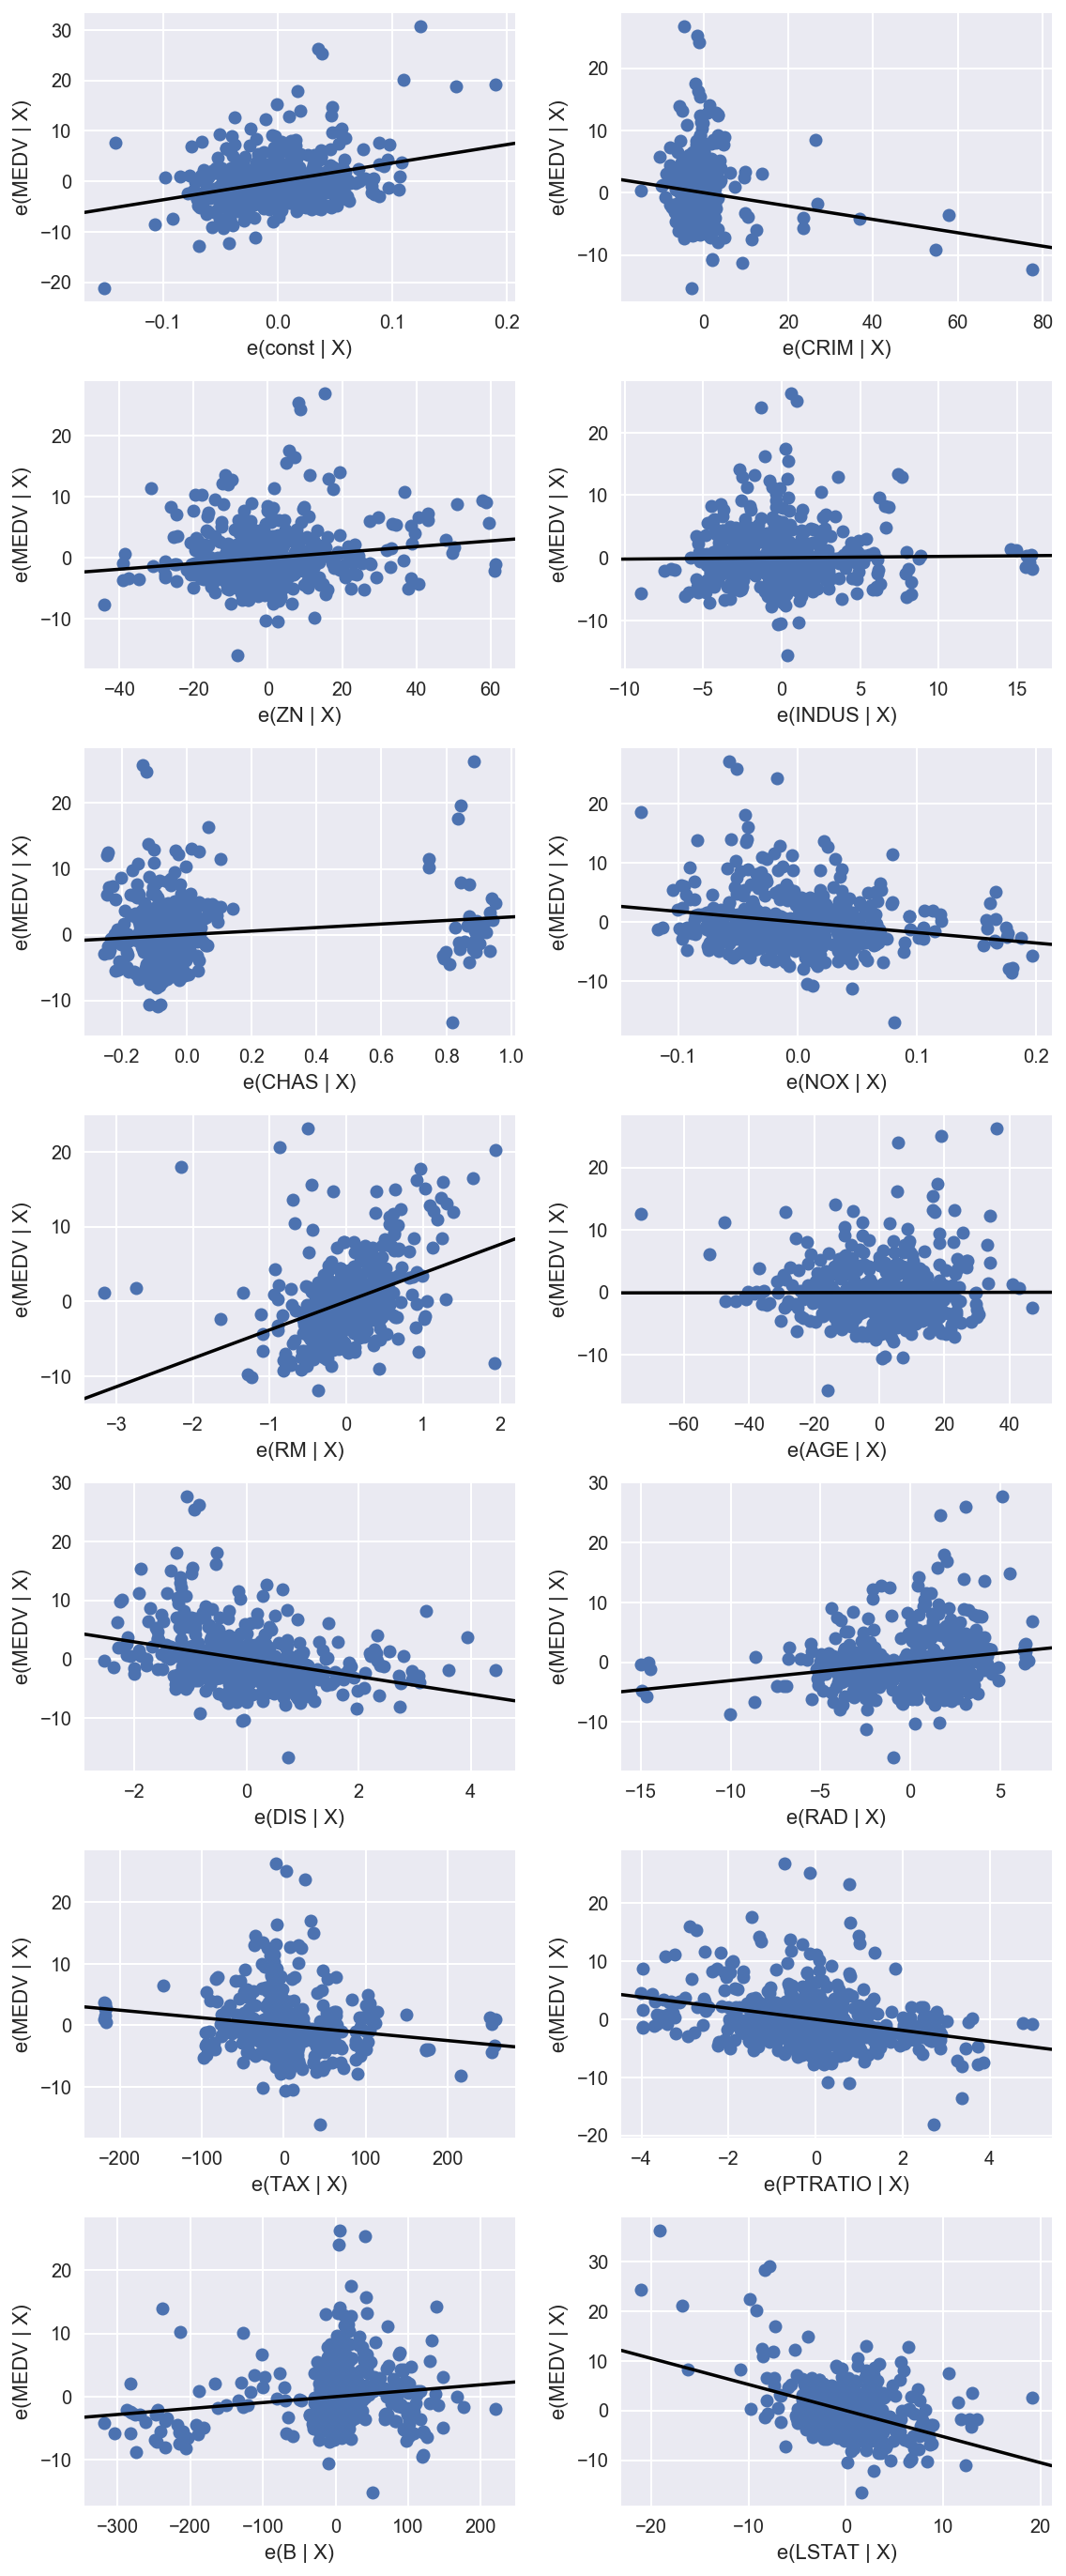

In [4]:
fig = plt.figure(figsize=(8,20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

## CCPR 플롯

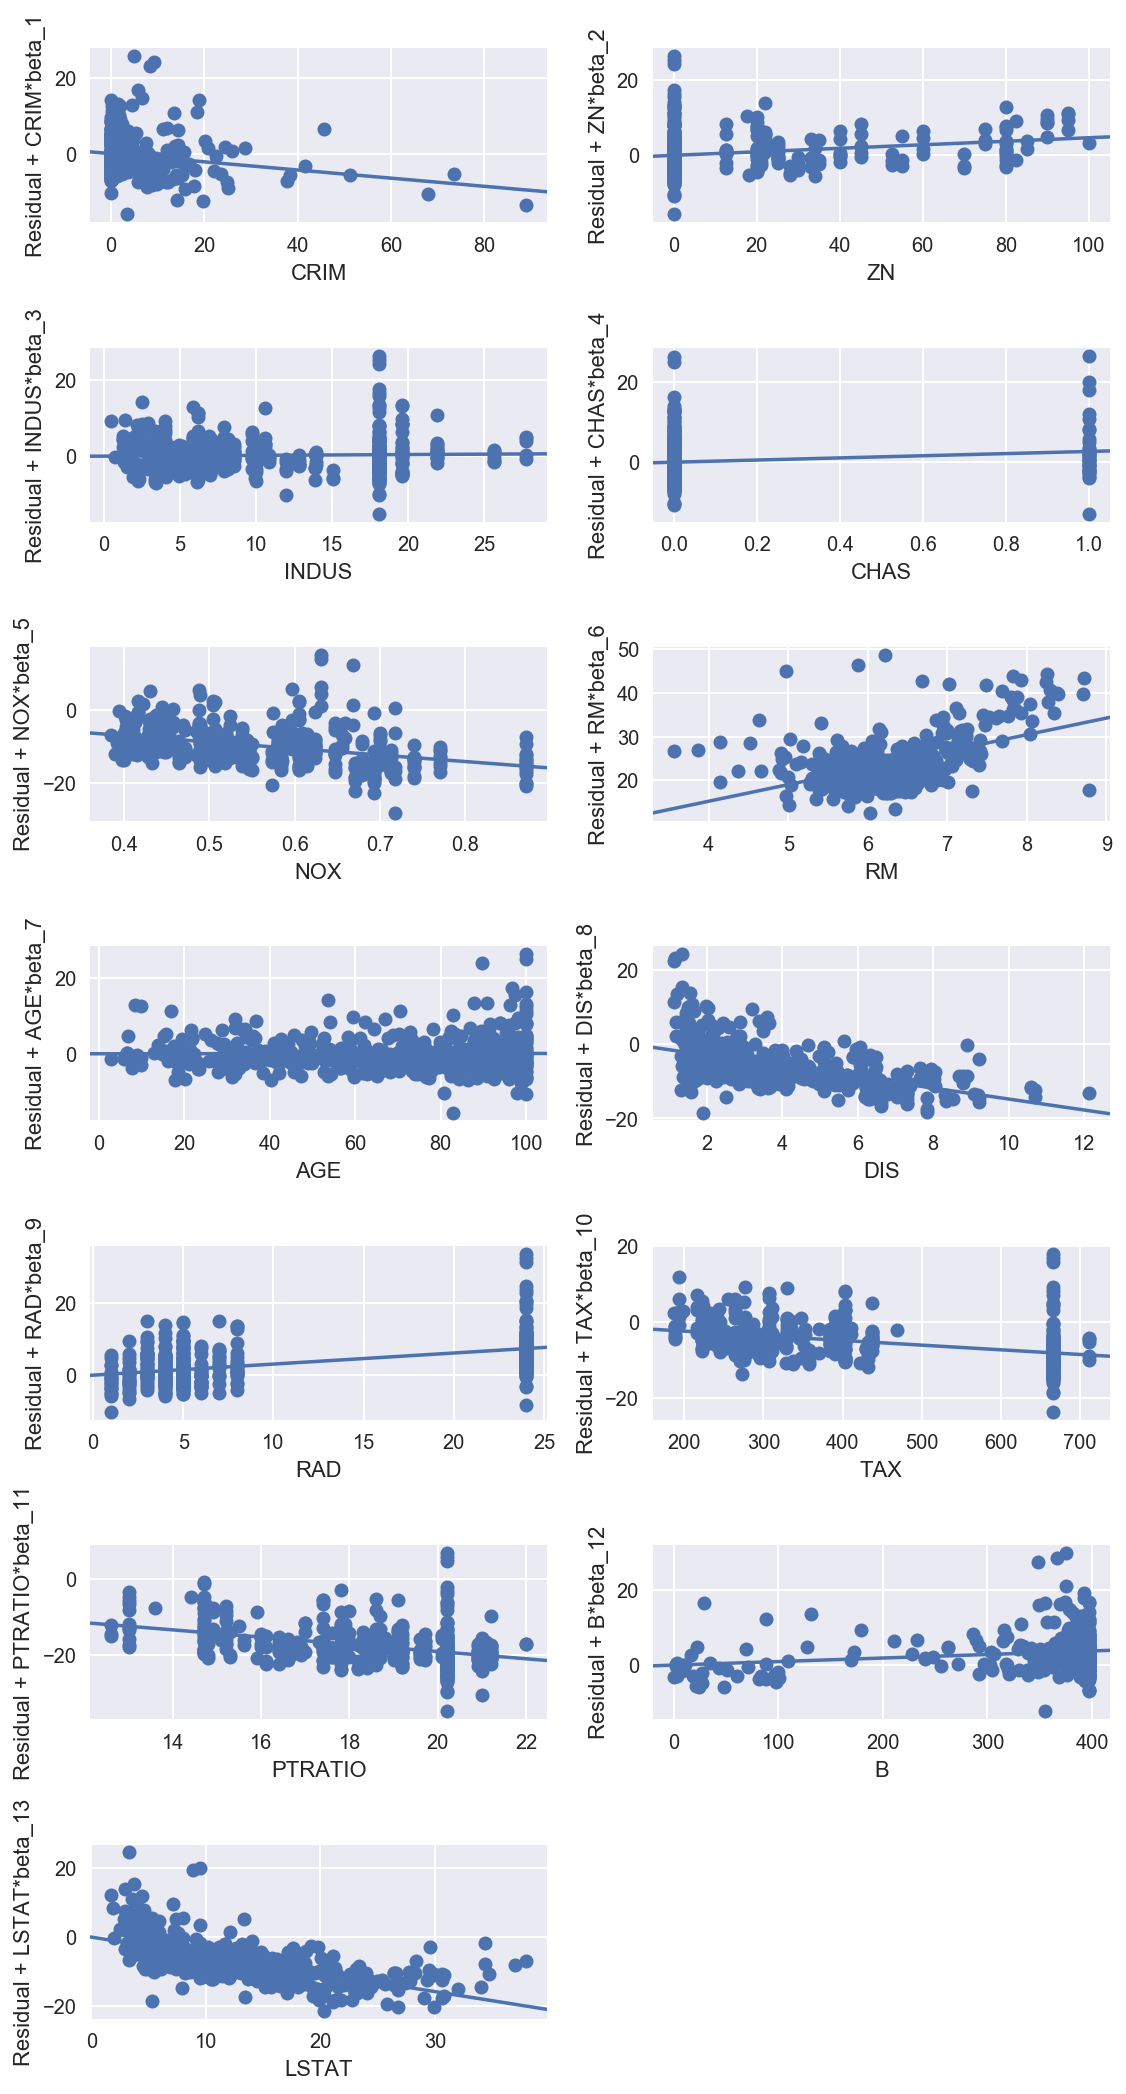

In [5]:
fig = plt.figure(figsize=(8, 15))
sm.graphics.plot_ccpr_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

## 이분산성
선형 회귀 모형에서는 종속 변수 값의 분산이 독립 변수의 값과 상관없이 고정된 값을 가져야한다. 그러나 실제 데이터는 독립 변수 값의 크기가 커지면 종속 변수 값의 분산도 커지는 이분산성(heteroskedastic) 문제가 발생한다.